In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Average Price by listing in 2020

In [4]:
# load the data
cal_2020 = pd.read_csv('../../../2. Analysis/Calendars Analysis/2020/Output Average Price CSV/average_price_by_listing_id_price_range_df.csv')

Average Price by listing in 2021

In [5]:
cal_2021 = pd.read_csv('../../../2. Analysis/Calendars Analysis/2021/Output Average Price CSV/2021_AveragePriceByListingIDPriceRange.csv')

Average Price by listing in 2022

In [6]:
cal_2022 = pd.read_csv('../../../2. Analysis/Calendars Analysis/2022/Output Average Price CSV/2022_AveragePriceByListingIDPriceRange.csv')

In [7]:
cal_2020['year'] = 2020
cal_2021['year'] = 2021
cal_2022['year'] = 2022

In [6]:
# caregorise year
cal_2020['year'] = pd.Categorical(cal_2020['year'])
cal_2021['year'] = pd.Categorical(cal_2021['year'])
cal_2022['year'] = pd.Categorical(cal_2022['year'])

In [7]:
# Combine the data
cal_combined = pd.concat([cal_2020, cal_2021, cal_2022])


In [8]:
# convert yeat to category
cal_combined['year'] = pd.Categorical(cal_combined['year'])

In [9]:
# order year to 2020, 2021, 2022
cal_combined['year'] = cal_combined['year'].cat.reorder_categories([2020, 2021, 2022])

In [10]:
print(cal_combined)

       listing_id price_segment  mean_price           neighbourhood  \
0           11551        Budget   90.000000                 Lambeth   
1           15400        Budget   75.000000  Kensington and Chelsea   
2           17402        Luxury  312.966418             Westminster   
3           25023        Budget   66.417910              Wandsworth   
4           36299      High-End  195.000000    Richmond upon Thames   
...           ...           ...         ...                     ...   
38210    53709893      High-End  150.000000                 Croydon   
38211    53710986        Luxury  300.488152                  Ealing   
38212    53711668      High-End  130.000000                Haringey   
38213    53712786      Superior  787.654275  Kensington and Chelsea   
38214    53713050     Mid-Range   97.289720               Southwark   

      most_frequent_segment  year  
0                       NaN  2020  
1                       NaN  2020  
2                       NaN  2020  
3  

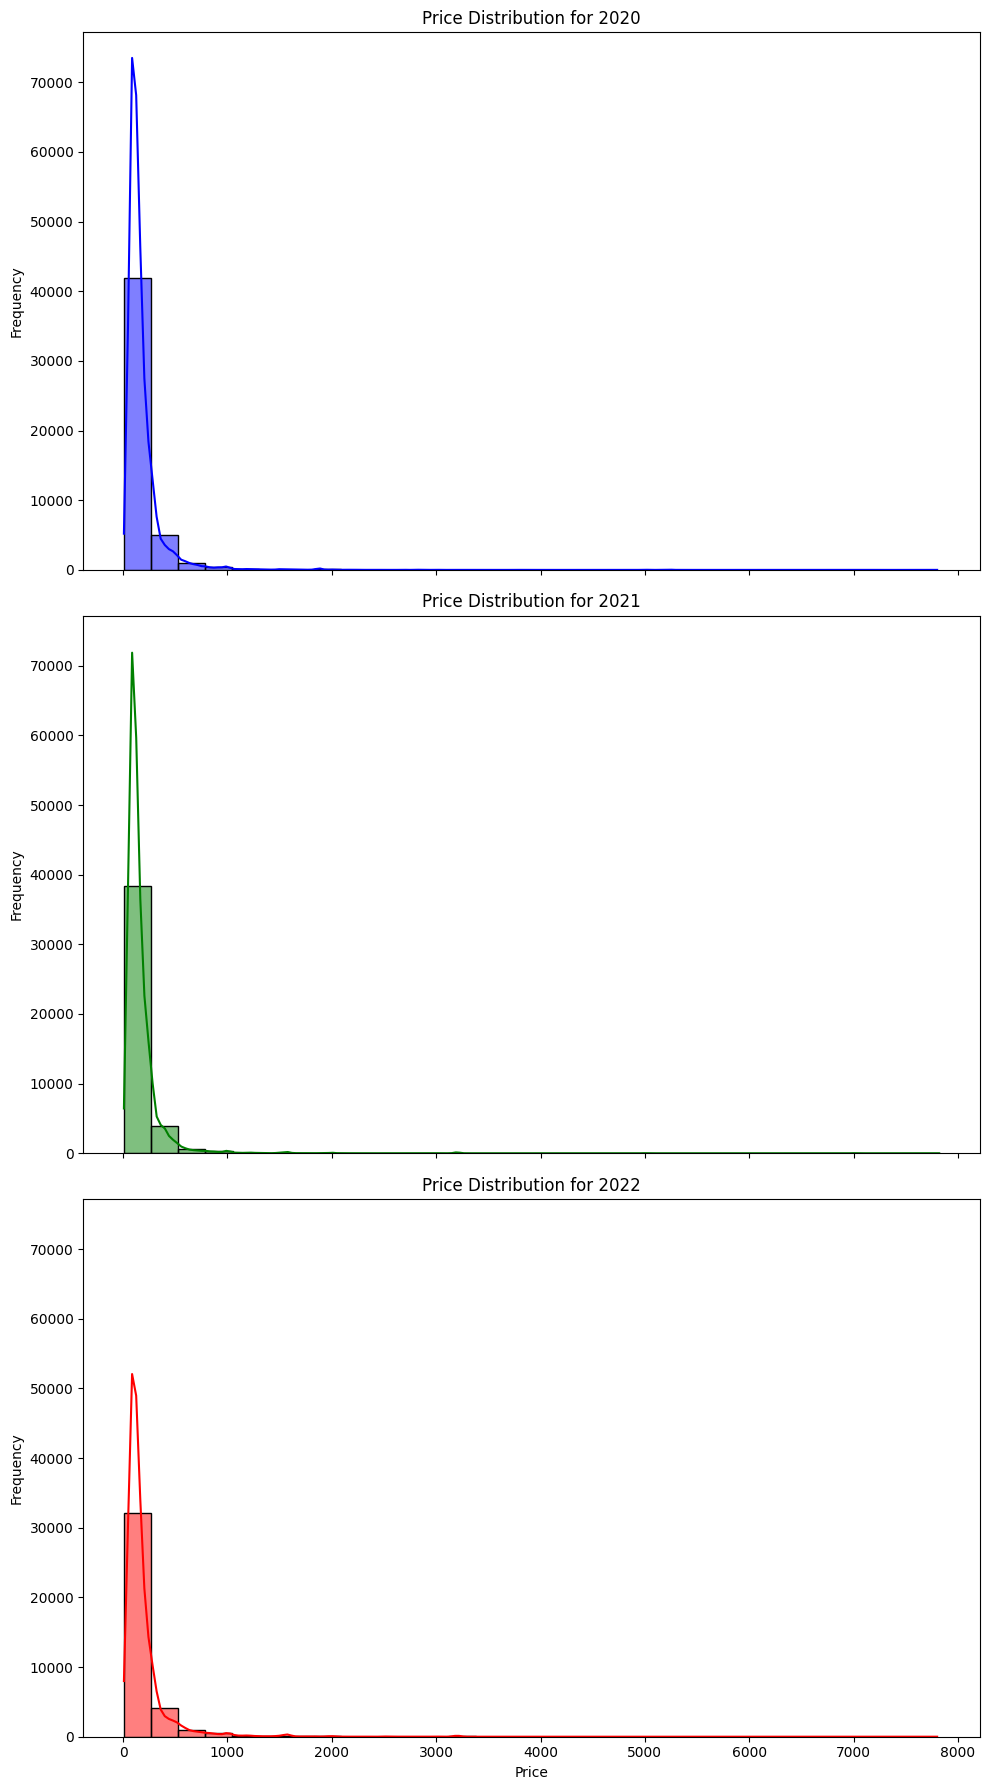

In [11]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True, sharey=True)

# Plot the distribution for 2020
sns.histplot(cal_2020['mean_price'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Price Distribution for 2020')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Plot the distribution for 2021
sns.histplot(cal_2021['mean_price'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title('Price Distribution for 2021')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

# Plot the distribution for 2022
sns.histplot(cal_2022['mean_price'], bins=30, kde=True, color='red', ax=axes[2])
axes[2].set_title('Price Distribution for 2022')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


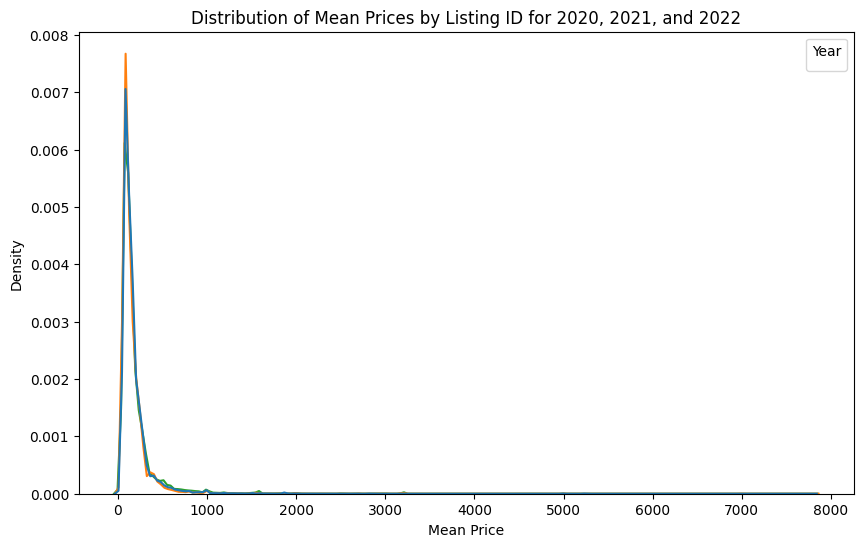

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cal_combined, x='mean_price', hue='year', common_norm=False, bw_adjust=0.5)
plt.title('Distribution of Mean Prices by Listing ID for 2020, 2021, and 2022')
plt.xlabel('Mean Price')
plt.ylabel('Density')
plt.legend(title='Year', loc='upper right')
plt.show()

In [13]:
print(cal_combined)

       listing_id price_segment  mean_price           neighbourhood  \
0           11551        Budget   90.000000                 Lambeth   
1           15400        Budget   75.000000  Kensington and Chelsea   
2           17402        Luxury  312.966418             Westminster   
3           25023        Budget   66.417910              Wandsworth   
4           36299      High-End  195.000000    Richmond upon Thames   
...           ...           ...         ...                     ...   
38210    53709893      High-End  150.000000                 Croydon   
38211    53710986        Luxury  300.488152                  Ealing   
38212    53711668      High-End  130.000000                Haringey   
38213    53712786      Superior  787.654275  Kensington and Chelsea   
38214    53713050     Mid-Range   97.289720               Southwark   

      most_frequent_segment  year  
0                       NaN  2020  
1                       NaN  2020  
2                       NaN  2020  
3  

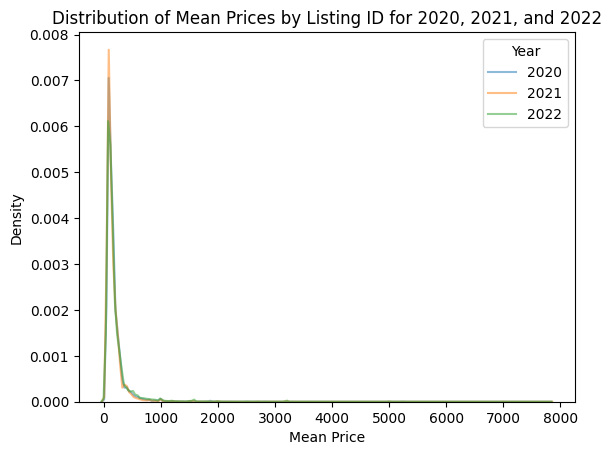

In [14]:
sns.kdeplot(data=cal_combined[cal_combined['year'] == 2020], x='mean_price', label='2020', bw_adjust=0.5, alpha=0.5)
sns.kdeplot(data=cal_combined[cal_combined['year'] == 2021], x='mean_price', label='2021', bw_adjust=0.5, alpha=0.5)
sns.kdeplot(data=cal_combined[cal_combined['year'] == 2022], x='mean_price', label='2022', bw_adjust=0.5, alpha=0.5)

plt.title('Distribution of Mean Prices by Listing ID for 2020, 2021, and 2022')
plt.xlabel('Mean Price')
plt.ylabel('Density')
plt.legend(title='Year')
plt.show()

In [15]:
# average mean_price by price segment in cal 2020 and cal 2021 and cal 2022 separately
cal_2020_avg = cal_2020.groupby('price_segment')['mean_price'].mean().reset_index()
cal_2021_avg = cal_2021.groupby('price_segment')['mean_price'].mean().reset_index()
cal_2022_avg = cal_2022.groupby('price_segment')['mean_price'].mean().reset_index()


In [16]:
# order the price segment budget,mid-range, high-end,luxury, superior
price_order = ['Budget', 'Mid-Range', 'High-End', 'Luxury', 'Superior']

# order the cal_2020_avg, cal_2021_avg, cal_2022_avg
cal_2020_avg['price_segment'] = pd.Categorical(cal_2020_avg['price_segment'], categories=price_order, ordered=True)
cal_2021_avg['price_segment'] = pd.Categorical(cal_2021_avg['price_segment'], categories=price_order, ordered=True)
cal_2022_avg['price_segment'] = pd.Categorical(cal_2022_avg['price_segment'], categories=price_order, ordered=True)


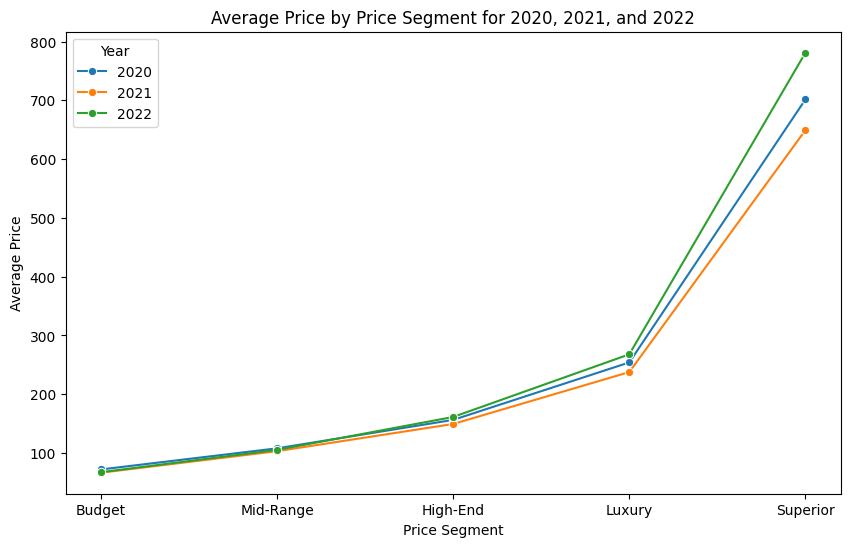

In [17]:
# plot the average mean_price by price segment
plt.figure(figsize=(10, 6))
sns.lineplot(data=cal_2020_avg, x='price_segment', y='mean_price', marker='o', label='2020')
sns.lineplot(data=cal_2021_avg, x='price_segment', y='mean_price', marker='o', label='2021')
sns.lineplot(data=cal_2022_avg, x='price_segment', y='mean_price', marker='o', label='2022')
plt.title('Average Price by Price Segment for 2020, 2021, and 2022')
plt.xlabel('Price Segment')
plt.ylabel('Average Price')
plt.legend(title='Year')
plt.show()


In [18]:
# the percentage change in average mean_price by price segment from 2020 to 2021 and 2022
cal_2020_avg['mean_price_2021'] = cal_2021_avg['mean_price']    
cal_2020_avg['mean_price_2022'] = cal_2022_avg['mean_price']

cal_2020_avg['price_change_2021'] = ((cal_2020_avg['mean_price_2021'] - cal_2020_avg['mean_price']) / cal_2020_avg['mean_price']) * 100
cal_2020_avg['price_change_2022'] = ((cal_2020_avg['mean_price_2022'] - cal_2020_avg['mean_price']) / cal_2020_avg['mean_price']) * 100


In [19]:
# order price segment Budget, Mid-Range, High-End, Luxury, Superior
cal_2020_avg['price_segment'] = pd.Categorical(cal_2020_avg['price_segment'], categories=price_order, ordered=True)

In [41]:
print(cal_2020_avg)

  price_segment                mean_price           mean_price_2021  \
0        Budget   72.04272133313752135564   66.48493474689428239799   
1      High-End  156.34592538143959927766  149.38950684016683112532   
2        Luxury  254.10528055627102617109  237.71515465588242932427   
3     Mid-Range  107.95536006217930946605  103.14507381340490610455   
4      Superior  701.57938203473111116182  649.34154390445769422513   

            mean_price_2022       price_change_2021        price_change_2022  \
0   67.38771673407850926196 -7.71457058172901355420  -6.46145025190469457499   
1  161.33072448083498784399 -4.44937629445800109096   3.18831404607052970590   
2  267.90336458651358952920 -6.45013195495519919831   5.43006583729258984761   
3  105.31434438946824627692 -4.45581048129876222674  -2.44639605776860991071   
4  781.02048086282752592524 -7.44574875886067921726  11.32318036452270604286   

    price_change_2021_2022  
0   1.35787451792061597544  
1   7.99334430727063871558  
2  12

In [21]:
# percentage change from 2021 to 2022
cal_2020_avg['price_change_2021_2022'] = ((cal_2020_avg['mean_price_2022'] - cal_2020_avg['mean_price_2021']) / cal_2020_avg['mean_price_2021']) * 100

In [22]:
# unique listings in 2020, 2021, and 2022
unique_listings_2020 = cal_2020['listing_id'].nunique()
unique_listings_2021 = cal_2021['listing_id'].nunique()
unique_listings_2022 = cal_2022['listing_id'].nunique()

# print the unique listings
print('Unique Listings in 2020:', unique_listings_2020)
print('Unique Listings in 2021:', unique_listings_2021)
print('Unique Listings in 2022:', unique_listings_2022)


Unique Listings in 2020: 47417
Unique Listings in 2021: 41595
Unique Listings in 2022: 37437


In [23]:
# value counts for each price segment for each year
cal_2020['price_segment'].value_counts()


price_segment
Budget       12863
High-End     12202
Mid-Range    11122
Luxury        8722
Superior      3610
Name: count, dtype: int64

In [24]:
# value counts for each price segment for each year
cal_2021['price_segment'].value_counts()

price_segment
Budget       11671
Mid-Range    11352
High-End      9328
Luxury        7766
Superior      3291
Name: count, dtype: int64

In [25]:
cal_2022['price_segment'].value_counts()

price_segment
High-End     9852
Mid-Range    9597
Budget       9467
Luxury       5802
Superior     3497
Name: count, dtype: int64

In [26]:
sorted_neighbourhoods = cal_2020.sort_values(by='mean_price', ascending=False)['neighbourhood']

In [27]:
# group price by neighbourhood and order neighbourhood by mean price
cal_2020_neighbourhood = cal_2020.groupby('neighbourhood')['mean_price'].mean().reset_index()

# order descending by mean price
cal_2020_neighbourhood = cal_2020_neighbourhood.sort_values(by='mean_price', ascending=False)

Coefficient of Price Variation in 2020

In [8]:
coef_2020 = pd.read_csv('../../../2. Analysis/Calendars Analysis/2020/Output Coefficient of Price Variation CSV/coefficient_of_variation_by_listing_neighbourhood_price_segment_2020.csv')

In [29]:
# categoirse price range in cal_2020 Budget, Mid-Range, High-End, Luxury, Superior
coef_2020['price_range'] = pd.Categorical(coef_2020['price_range'], categories=price_order, ordered=True)

C:\Users\ggeor\AppData\Local\Temp\ipykernel_25592\1964945319.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


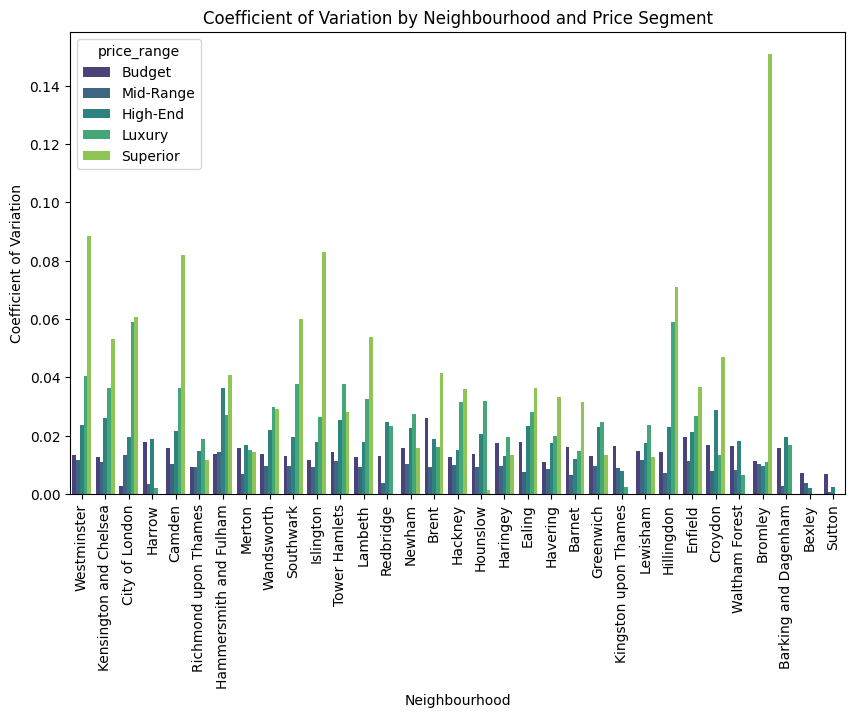

In [30]:
# Plot the coefficient of variation by neighborhood and price_range
plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_2020,
    x='neighbourhood',
    y='price',
    hue='price_range',
    palette='viridis',
    ci=None,
    order=cal_2020_neighbourhood['neighbourhood']
)
plt.title('Coefficient of Variation by Neighbourhood and Price Segment')
plt.xlabel('Neighbourhood')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=90)
plt.show()

Coefficient of Price Variation in 2021

In [9]:
loaded_df = pd.read_json('../../../2. Analysis/Calendars Analysis/2021/Output Coefficient of Price Variation CSV/2021_coefficient_of_price_variation_by_price_segment_neighbourhood.json', orient='records', lines=True)

In [32]:
pd.set_option('display.precision', 20)

In [33]:
print(loaded_df)

       listing_id price_range                   price           neighbourhood
0           15400      Budget  0.00153582422817372739  Kensington and Chelsea
1           17402      Luxury  0.03702646690665061663             Westminster
2           36299      Luxury  0.00000000000000000000    Richmond upon Thames
3           36986      Budget  0.00000000000000000000                 Hackney
4           38610      Luxury  0.06348366599770219332  Hammersmith and Fulham
...           ...         ...                     ...                     ...
43403    48102439   Mid-Range  0.00000000000000000000                 Lambeth
43404    48102612      Luxury  0.02719127480409786260              Wandsworth
43405    48102679    High-End  0.00000000000000000000                  Camden
43406    48102989    High-End  0.10105273422373882430              Wandsworth
43407    48102989      Luxury  0.05708347071627668801              Wandsworth

[43408 rows x 4 columns]


In [34]:
# group mean price by neighbourhood in loaded_df
loaded_df_neighbourhood = loaded_df.groupby('neighbourhood')['price'].mean().reset_index()

# order neighbourhood by mean price
loaded_df_neighbourhood = loaded_df_neighbourhood.sort_values(by='price', ascending=False)

In [35]:
sorted_neighbourhoods_21 = cal_2021.sort_values(by='mean_price', ascending=False)['neighbourhood']

In [36]:
# categorise price_range in Budget, Mid-Range, High-End, Luxury, Superior
loaded_df['price_range'] = pd.Categorical(loaded_df['price_range'], categories=price_order, ordered=True)

C:\Users\ggeor\AppData\Local\Temp\ipykernel_25592\2588635431.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


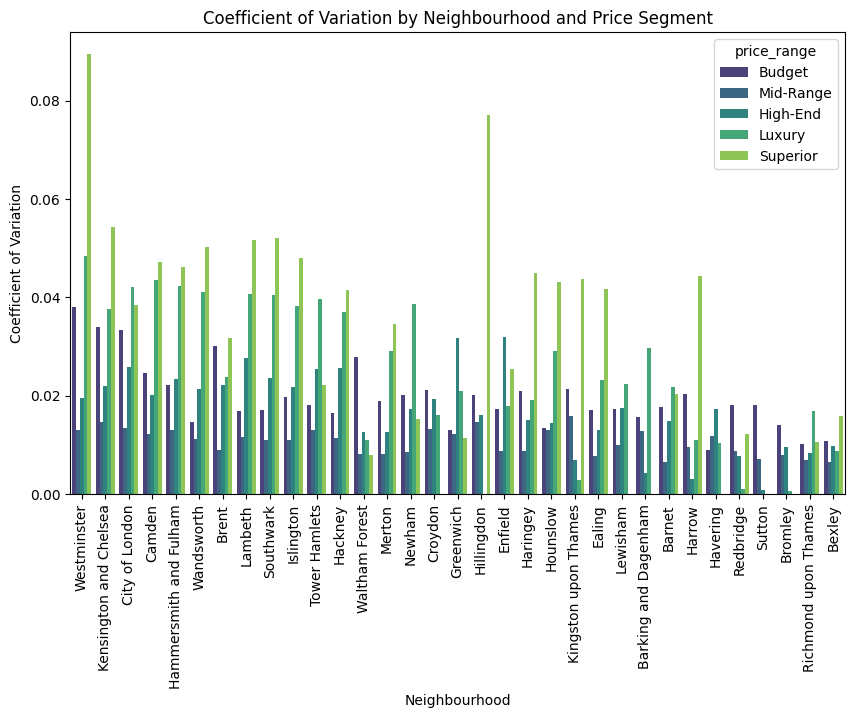

In [37]:
# Plot the coefficient of variation by neighborhood and price_range
plt.figure(figsize=(10, 6))
sns.barplot(
    data=loaded_df,
    x='neighbourhood',
    y='price',
    hue='price_range',
    palette='viridis',
    ci=None,
    order=loaded_df_neighbourhood['neighbourhood']
)
plt.title('Coefficient of Variation by Neighbourhood and Price Segment')
plt.xlabel('Neighbourhood')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=90)
plt.show()

Coefficient of Price Variation in 2022

In [10]:
# load the 2022_coefficient_of_price_variation_by_price_segment_neighbourhood.json
loaded_df_22 = pd.read_json('../../../2. Analysis/Calendars Analysis/2022/Output Coefficient of Price Variation CSV/2022_coefficient_of_price_variation_by_price_segment_neighbourhood.json', orient='records', lines=True)

In [45]:
print(loaded_df_22)

       listing_id price_range                   price           neighbourhood
0           15400      Budget  0.00000000000000000000  Kensington and Chelsea
1           17402      Luxury  0.03698876905507035573             Westminster
2           36299    High-End  0.00000000000000000000    Richmond upon Thames
3           38610    High-End  0.01747375681859919538  Hammersmith and Fulham
4           41445      Luxury  0.00000000000000000000                  Barnet
...           ...         ...                     ...                     ...
38210    53709893    High-End  0.00000000000000000000                 Croydon
38211    53710986      Luxury  0.07763559493366972708                  Ealing
38212    53711668    High-End  0.00000000000000000000                Haringey
38213    53712786    Superior  0.22091600333346705920  Kensington and Chelsea
38214    53713050   Mid-Range  0.00467362646089389960               Southwark

[38215 rows x 4 columns]


In [46]:
# categoirse price range in cal_2020 Budget, Mid-Range, High-End, Luxury, Superior
loaded_df_22['price_range'] = pd.Categorical(loaded_df_22['price_range'], categories=price_order, ordered=True)

In [48]:
# group mean price by neighbourhood in loaded_df
loaded_df_neighbourhood_22 = loaded_df_22.groupby('neighbourhood')['price'].mean().reset_index()

# order neighbourhood by mean price
loaded_df_neighbourhood_22 = loaded_df_neighbourhood_22.sort_values(by='price', ascending=False)

In [49]:
sorted_neighbourhoods_22 = cal_2022.sort_values(by='mean_price', ascending=False)['neighbourhood']

C:\Users\ggeor\AppData\Local\Temp\ipykernel_25592\2629815580.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


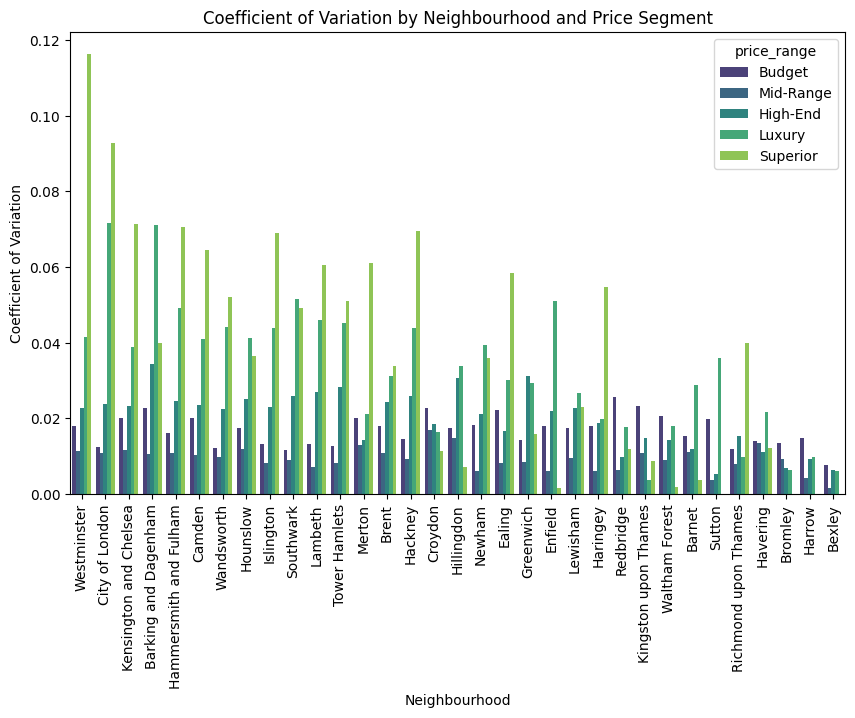

In [51]:
# Plot the coefficient of variation by neighborhood and price_range
plt.figure(figsize=(10, 6))
sns.barplot(
    data=loaded_df_22,
    x='neighbourhood',
    y='price',
    hue='price_range',
    palette='viridis',
    ci=None,
    order=loaded_df_neighbourhood_22['neighbourhood']
)
plt.title('Coefficient of Variation by Neighbourhood and Price Segment')
plt.xlabel('Neighbourhood')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=90)
plt.show()

In [52]:
# groupby price segment the coefficient of variation in 2020, 2021 and 2022 separately
coef_2020_avg = coef_2020.groupby('price_range')['price'].mean().reset_index()
coef_2021_avg = loaded_df.groupby('price_range')['price'].mean().reset_index()
coef_2022_avg = loaded_df_22.groupby('price_range')['price'].mean().reset_index()

C:\Users\ggeor\AppData\Local\Temp\ipykernel_25592\1664240696.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coef_2020_avg = coef_2020.groupby('price_range')['price'].mean().reset_index()
C:\Users\ggeor\AppData\Local\Temp\ipykernel_25592\1664240696.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coef_2021_avg = loaded_df.groupby('price_range')['price'].mean().reset_index()
C:\Users\ggeor\AppData\Local\Temp\ipykernel_25592\1664240696.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior 

In [54]:
# order the price segment budget,mid-range, high-end,luxury, superior
price_order = ['Budget', 'Mid-Range', 'High-End', 'Luxury', 'Superior']

# order the cal_2020_avg, cal_2021_avg, cal_2022_avg
coef_2020_avg['price_range'] = pd.Categorical(coef_2020_avg['price_range'], categories=price_order, ordered=True)
coef_2021_avg['price_range'] = pd.Categorical(coef_2021_avg['price_range'], categories=price_order, ordered=True)
coef_2022_avg['price_range'] = pd.Categorical(coef_2022_avg['price_range'], categories=price_order, ordered=True)


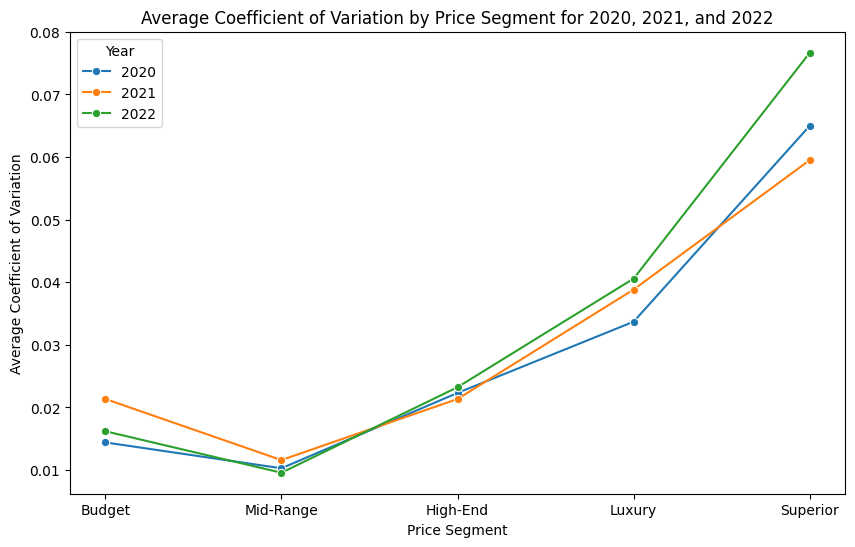

In [55]:
# plot the average mean_price by price segment
plt.figure(figsize=(10, 6))
sns.lineplot(data=coef_2020_avg, x='price_range', y='price', marker='o', label='2020')
sns.lineplot(data=coef_2021_avg, x='price_range', y='price', marker='o', label='2021')
sns.lineplot(data=coef_2022_avg, x='price_range', y='price', marker='o', label='2022')
plt.title('Average Coefficient of Variation by Price Segment for 2020, 2021, and 2022')
plt.xlabel('Price Segment')
plt.ylabel('Average Coefficient of Variation')
plt.legend(title='Year')
plt.show()


In [56]:
# the percentage change in average mean_price by price segment from 2020 to 2021 and 2022
coef_2020_avg['mean_price_2021'] = coef_2021_avg['price']    
coef_2020_avg['mean_price_2022'] = coef_2022_avg['price']

coef_2020_avg['price_change_2021'] = ((coef_2020_avg['mean_price_2021'] - coef_2020_avg['price']) / coef_2020_avg['price']) * 100
coef_2020_avg['price_change_2022'] = ((coef_2020_avg['mean_price_2022'] - coef_2020_avg['price']) / coef_2020_avg['price']) * 100

# percentage change from 2021 to 2022
coef_2020_avg['price_change_2021_2022'] = ((coef_2020_avg['mean_price_2022'] - coef_2020_avg['mean_price_2021']) / coef_2020_avg['mean_price_2021']) * 100

In [57]:
print(coef_2020_avg)

  price_range                   price         mean_price_2021  \
0      Budget  0.01440977108056753359  0.02135153086723502389   
1   Mid-Range  0.01027601766331657542  0.01158637241601815152   
2    High-End  0.02231295596408085918  0.02134214430608204899   
3      Luxury  0.03370006506864320350  0.03883536777123335060   
4    Superior  0.06500699667124024139  0.05951903374020219017   

          mean_price_2022        price_change_2021        price_change_2022  \
0  0.01619559467016882734  48.17397686510705767660  12.39314337206638327871   
1  0.00956596877845228809  12.75158135801277303756  -6.90976707250150479211   
2  0.02322637664448257838  -4.35088770650384315530   4.09367849724677146384   
3  0.04058499571585635207  15.23825752896951257753  20.43002182099449015595   
4  0.07666787610226824534  -8.44211117580514525116  17.93788365581715282815   

    price_change_2021_2022  
0 -24.14785257846890331734  
1 -17.43775847194983086297  
2   8.82869270949294460138  
3   4.505243660699

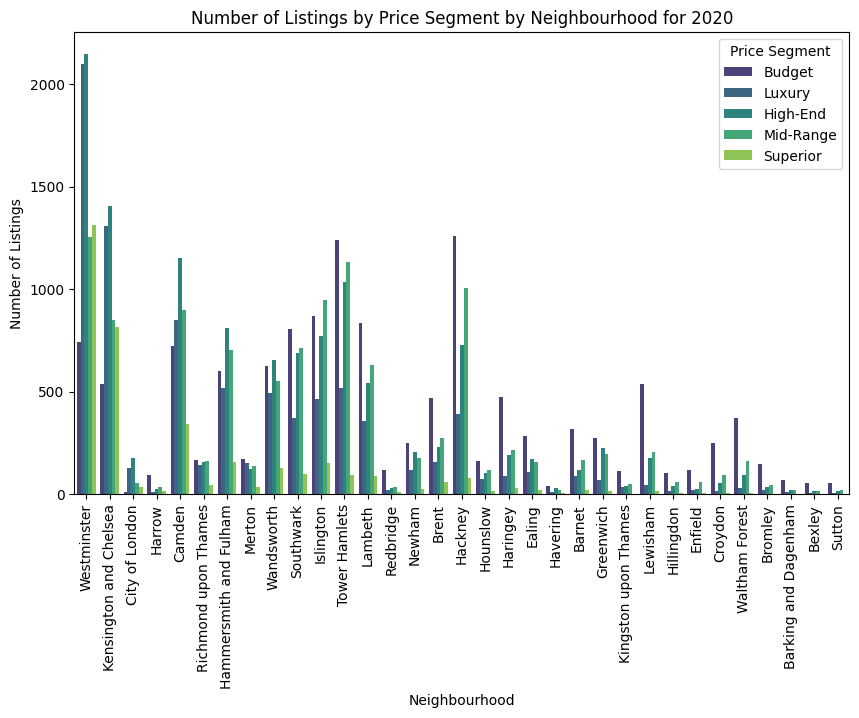

In [38]:
# plot number of listings by price segment by neighbourhood for cal_2020
plt.figure(figsize=(10, 6))
sns.countplot(
    data=cal_2020,
    x='neighbourhood',
    hue='price_segment',
    palette='viridis',
    order=cal_2020_neighbourhood['neighbourhood']
)
plt.title('Number of Listings by Price Segment by Neighbourhood for 2020')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.legend(title='Price Segment')
plt.show()


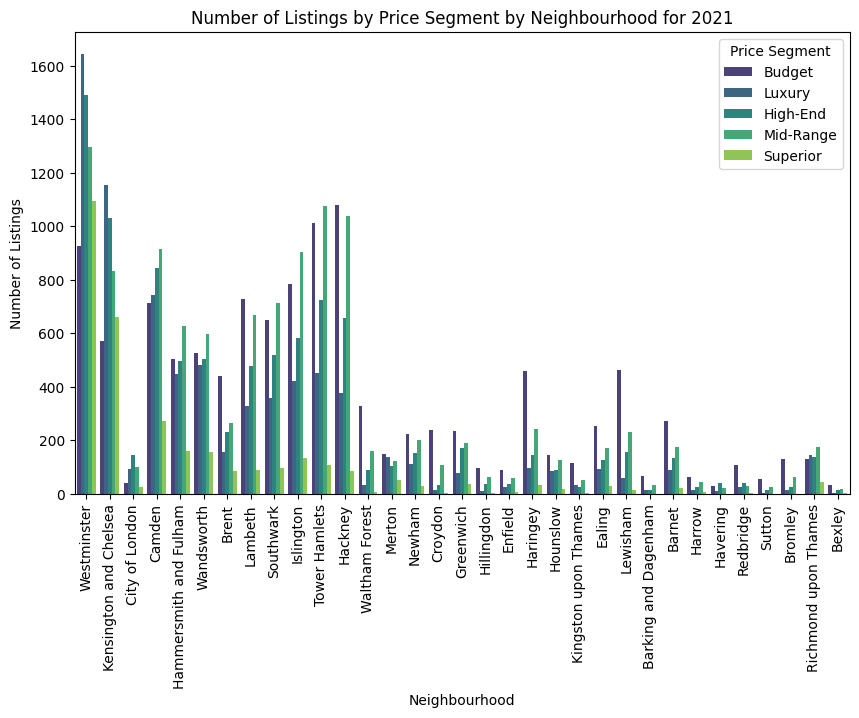

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=cal_2021,
    x='neighbourhood',
    hue='price_segment',
    palette='viridis',
    order=loaded_df_neighbourhood['neighbourhood']
)
plt.title('Number of Listings by Price Segment by Neighbourhood for 2021')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.legend(title='Price Segment')
plt.show()

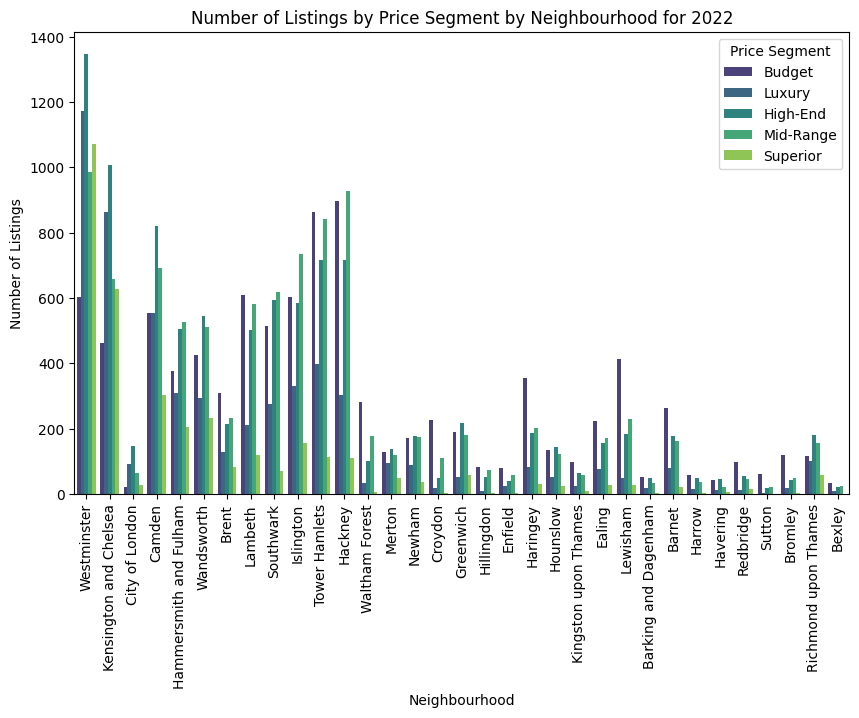

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=cal_2022,
    x='neighbourhood',
    hue='price_segment',
    palette='viridis',
    order=loaded_df_neighbourhood['neighbourhood']
)
plt.title('Number of Listings by Price Segment by Neighbourhood for 2022')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.legend(title='Price Segment')
plt.show()

In [43]:
print(loaded_df)

       listing_id price_range                   price           neighbourhood
0           15400      Budget  0.00153582422817372739  Kensington and Chelsea
1           17402      Luxury  0.03702646690665061663             Westminster
2           36299      Luxury  0.00000000000000000000    Richmond upon Thames
3           36986      Budget  0.00000000000000000000                 Hackney
4           38610      Luxury  0.06348366599770219332  Hammersmith and Fulham
...           ...         ...                     ...                     ...
43403    48102439   Mid-Range  0.00000000000000000000                 Lambeth
43404    48102612      Luxury  0.02719127480409786260              Wandsworth
43405    48102679    High-End  0.00000000000000000000                  Camden
43406    48102989    High-End  0.10105273422373882430              Wandsworth
43407    48102989      Luxury  0.05708347071627668801              Wandsworth

[43408 rows x 4 columns]
